In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


drive.mount("/content/drive")
path = "/content/drive/MyDrive/Dataset/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image = Image.open(f"{path}/s1/1.pgm")
D = np.asarray(image).flatten()
for i in range(1,41):
  for j in range(1,11):
    if i==1 and j==1:
      continue
    image = Image.open(f"{path}/s{i}/{j}.pgm")
    matrix = np.asarray(image).flatten()
    D= np.vstack([D,matrix])


In [ ]:
y=[]
for i in range(1,41):
  for j in range(1,11):
    y.append(i)

In [ ]:
bonus=False
if bonus:
      # D_train,D_test,y_train,y_test=train_test_split(D, y, test_size=0.3, train_size=0.7, random_state=17, stratify=y)
      D_train=[]
      D_test=[]
      y_test=[]
      y_train=[]
      for i in range (0, 400, 10):
        test_counter=0
        train_counter=0
        while train_counter < 7:
          D_train.append(D[i+train_counter])
          train_counter+=1
        while test_counter< 3:
          D_test.append(D[i+7+test_counter])
          test_counter+=1
      for i in range(1,41):
        for j in range(7):
          y_train.append(i)
      for i in range(1,41):
        for j in range(3):
          y_test.append(i)
      D_train=np.array(D_train)
      D_test=np.array(D_test)
      y_train=np.array(y_train)
      y_test=np.array(y_test)
else:
      D_train=np.array(D[1])
      D_test=np.array(D[0])
      y_test=np.array([1])
      y_train=np.array([1])
      for i in range(2,400):
        if i%2==0:
            D_test= np.vstack([D_test,D[i]])
            y_test=np.append(y_test,y[i])
        else:
            D_train= np.vstack([D_train,D[i]])
            y_train=np.append(y_train,y[i])

In [ ]:
M=np.mean(D_train,axis=0)
Z= D_train-M
COV = np.cov(Z,bias=True,rowvar=False)
eigenvalues_temp, U_temp= LA.eigh(COV)
eigenvalues=np.diag(eigenvalues_temp)
U=U_temp.T[::-1]




In [ ]:
total=0
trace=np.sum(eigenvalues_temp)
alphas=[0.8,0.85,0.9,0.95]
r=[0,0,0,0]
index=0
for i in range(eigenvalues_temp.size-1,-1,-1):
  total+=eigenvalues_temp[i]
  fr=total/trace
  if fr>=alphas[index]:
    r[index]=eigenvalues_temp.size-i
    index+=1
    if index==4:
      break
print(r)

[37, 53, 77, 116]


In [ ]:
def knn(X_train, X_test, y_train, y_test,k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_predict) * 100
    return accuracy

Accuracy for r=37 k=1: 93.0 %
Accuracy for r=37 k=3: 85.5 %
Accuracy for r=37 k=5: 80.5 %
Accuracy for r=37 k=7: 78.0 %
-----------------------------------


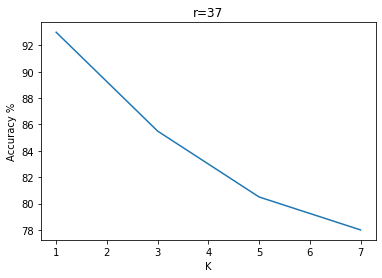

-----------------------------------
Accuracy for r=53 k=1: 94.0 %
Accuracy for r=53 k=3: 85.5 %
Accuracy for r=53 k=5: 83.0 %
Accuracy for r=53 k=7: 77.5 %
-----------------------------------


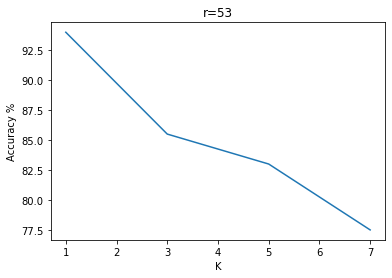

-----------------------------------
Accuracy for r=77 k=1: 94.5 %
Accuracy for r=77 k=3: 85.0 %
Accuracy for r=77 k=5: 81.5 %
Accuracy for r=77 k=7: 75.5 %
-----------------------------------


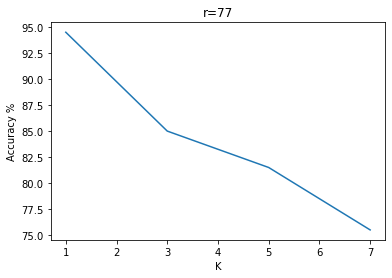

-----------------------------------
Accuracy for r=116 k=1: 93.5 %
Accuracy for r=116 k=3: 84.5 %
Accuracy for r=116 k=5: 81.5 %
Accuracy for r=116 k=7: 74.0 %
-----------------------------------


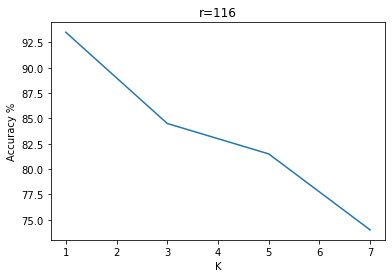

-----------------------------------


In [ ]:
ks=[1,3,5,7]
for i in range(len(r)):
  P=U[:r[i]]
  D_train_reduced=np.dot(D_train,P.T)
  D_test_reduced=np.dot(D_test,P.T)
  r_accuracies=[]
  for k in ks:
    accuracy=knn(D_train_reduced,D_test_reduced,y_train,y_test,k)
    r_accuracies.append(accuracy)
    print(f'Accuracy for r={r[i]} k={k}: {accuracy} %')
  print('-----------------------------------')
  plt.title(f'r={r[i]}')
  plt.xlabel('K')
  plt.ylabel('Accuracy %')
  plt.plot(ks,r_accuracies)
  plt.show()
  print('-----------------------------------')
    

In [ ]:
nk=5
if bonus:
  Dk=[]
  for i in range(0,280,7):
    Dk.append(D_train[i:i+7])
else:
  Dk=[]
  for i in range(0,200,5):
    Dk.append(D_train[i:i+5])
Mk=[]
for i in range(40):
  Mk.append(np.mean(Dk[i],axis=0))
Sb=np.zeros((10304,10304))
for i in range(40):
    Sk= Mk[i]-M
    Sb+=(nk*(np.dot(Sk,Sk.T)))

In [ ]:

S=np.zeros((10304,10304))
for i in range(40):
  Zk=Dk[i]-Mk[i]
  Sk=np.dot(Zk.T,Zk)
  S+=Sk

In [ ]:
eigens,w=LA.eigh(np.dot(LA.inv(S),Sb))

Accuracy for k=1: 94.5 %
Accuracy for k=3: 84.0 %
Accuracy for k=5: 76.0 %
Accuracy for k=7: 71.0 %


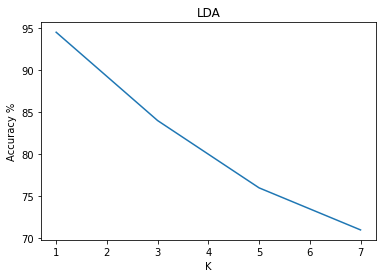

In [ ]:
W_temp=w.T[::-1]
W=W_temp[:40]
D_train_LDA_reduced=np.dot(D_train,W.T)
D_test_LDA_reduced=np.dot(D_test,W.T)
LDA_accuracies=[]
for k in ks:
    accuracy=knn(D_train_LDA_reduced,D_test_LDA_reduced,y_train,y_test,k)
    LDA_accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy} %')
plt.title(f'LDA')
plt.xlabel('K')
plt.ylabel('Accuracy %')
plt.plot(ks,LDA_accuracies)
plt.show()